<a href="https://colab.research.google.com/github/fatihbahri/deep_learning/blob/main/Emotion_Detection_My_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Emotion Detection from Facial Photos

## Google Drive Connection

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
import os
os.chdir('/gdrive/My Drive/Colab Notebooks')

In [4]:
!ls

 araba.jpg					        Img_Class_w_VGG16.ipynb
 ddef.jpg					        kepce.jpg
 dog1.jpg					        MNIST_Ornek.ipynb
 Emotion_Detection.ipynb			        models
'Emotion_Detection.ipynb adlı not defterinin kopyası'   Pomeranian_01.jpeg
 Evrisim.ipynb					        tree.jpg
 f35.jpg					        Untitled0.ipynb
 Fashion_MNIST.ipynb				       'VGG16 in Keras.ipynb'
 fer2013.csv


# Libraries

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint


## Review Dataset

In [8]:
# path_of_csv = '/gdrive/My Drive/Colab Notebooks/'
data = pd.read_csv('fer2013.csv') # Check referances

In [9]:
data.head(11)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [10]:
data.shape

(35887, 3)

35887 data with 3 columns

In [11]:
data["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

28709 data for Training


3589 data for PublicTest

3589 data for PrivateTest

## Training Data

In [13]:
# (x_train, y_train), (x_test, y_test)

In [14]:
data_train = data[data.Usage == "Training"]

In [15]:
train_pixel = data_train.pixels.str.split(" ").tolist()
pixel_images = pd.DataFrame(train_pixel, dtype=int)
pixel_images = pixel_images.values
train_images = pixel_images.astype(np.float)

In [16]:
train_images.shape

(28709, 2304)

### Training Images Preprocessing

In [17]:
def show(img):
  image_show = img.reshape(48,48)
  plt.axis('off')
  plt.imshow(image_show, cmap='gray')

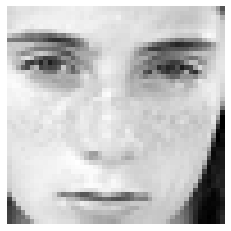

In [18]:
which_img = 28708
show(train_images[which_img])

In [19]:
print(data.loc[which_img, 'emotion'])
print("(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)")

4
(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)


## Test Data

### Test Images Preprocessing

In [20]:
data_test = data[data.Usage == "PublicTest"]
test_pixel = data_test.pixels.str.split(" ").tolist()
pixel_images2 = pd.DataFrame(test_pixel, dtype=int)
pixel_images2 = pixel_images2.values
test_images = pixel_images2.astype(np.float)

In [21]:
test_images.shape

(3589, 2304)

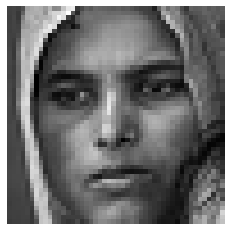

In [22]:
which_img2 = 3588
show(test_images[which_img2])

In [23]:
img_label2 = 28708 + which_img2
print(data.loc[img_label2, 'emotion'])
print("(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)")

4
(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)


### Review Dataset Images

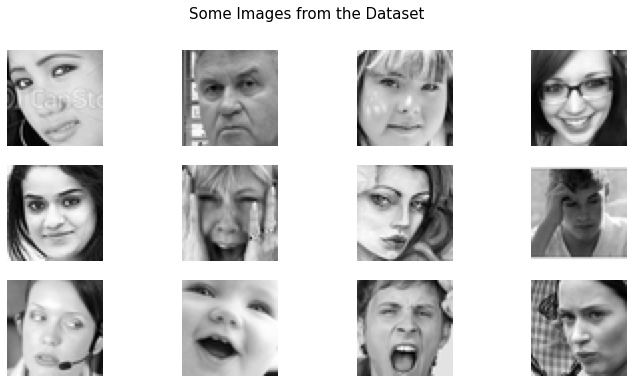

In [24]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3,4, i)
  plt.axis('off')
  image = test_images[i].reshape(48,48)
  plt.imshow(image, cmap='gray')
plt.suptitle('Some Images from the Dataset', fontsize=15)
plt.show()

# Creating Model & Layers

In [25]:
model = Sequential()

## Adding Layers

Layer 1: 1st Convolution

In [26]:
model.add(Conv2D(128, 3, data_format='channels_last', kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))

Layer 2: 2nd Convolution & Max Pooling & 0.25 DropOut

In [27]:
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))
model.add(Dropout(0.1))

Layer 3: 3rd Convolution (32 channels)

In [28]:
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))
model.add(Dropout(0.2))

Layer 4: 4th Convolution & Max Pooling & 0.3 DropOut

In [29]:
model.add(Conv2D(32, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1, padding='same'))
model.add(Dropout(0.3))

In [30]:
model.add(Conv2D(16, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.4))

Layer 5: Fully Connection & 0.5 Dropout

In [31]:
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

Layer 6: Output Layer

In [32]:
model.add(Dense(7))
model.add(Activation('softmax'))

## Model Compile

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Model Summary

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 43, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 43, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 43, 43, 64)        0

## Defining (x_train, y_train), (x_test, y_test)

In [35]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print(x_train.shape)
print(x_test.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)


In [36]:
def one_hot(labels_dense, num_classes):
  num_labels = labels_dense.shape[0]
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot

In [37]:
train_labels_flat = data_train["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]

In [38]:
y_train = one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)

In [39]:
test_labels_flat = data_test["emotion"].values.ravel()
test_labels_count = np.unique(train_labels_flat).shape[0]

In [40]:
y_test = one_hot(test_labels_flat, test_labels_count)
y_test = y_test.astype(np.uint8)

In [41]:
print(y_train.shape)
print(y_test.shape)

(28709, 7)
(3589, 7)


# Model Training

## Model CheckPoint

In [42]:
checkpoint_callback = ModelCheckpoint(filepath='models/emotion.h5', verbose=1, save_best_only=True)
epochs = 10
batchsize = 128

## Model Fit

In [43]:
hist = model.fit(x_train, y_train,
                 epochs=epochs,
                 batch_size=batchsize,
                 shuffle=True,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpoint_callback], verbose=2
                 )

Epoch 1/10
225/225 - 43s - loss: 1.8156 - accuracy: 0.3222 - val_loss: 7.2680 - val_accuracy: 0.2705

Epoch 00001: val_loss improved from inf to 7.26799, saving model to models/emotion.h5
Epoch 2/10
225/225 - 28s - loss: 1.4486 - accuracy: 0.4413 - val_loss: 1.4726 - val_accuracy: 0.4455

Epoch 00002: val_loss improved from 7.26799 to 1.47264, saving model to models/emotion.h5
Epoch 3/10
225/225 - 29s - loss: 1.3049 - accuracy: 0.4975 - val_loss: 1.3297 - val_accuracy: 0.4962

Epoch 00003: val_loss improved from 1.47264 to 1.32974, saving model to models/emotion.h5
Epoch 4/10
225/225 - 29s - loss: 1.2283 - accuracy: 0.5270 - val_loss: 1.5793 - val_accuracy: 0.4717

Epoch 00004: val_loss did not improve from 1.32974
Epoch 5/10
225/225 - 29s - loss: 1.1669 - accuracy: 0.5514 - val_loss: 1.3587 - val_accuracy: 0.4912

Epoch 00005: val_loss did not improve from 1.32974
Epoch 6/10
225/225 - 29s - loss: 1.1195 - accuracy: 0.5702 - val_loss: 1.3311 - val_accuracy: 0.5308

Epoch 00006: val_los

## Save model as JSON

In [ ]:
json = model.to_json()
with open('models/emotion.json', 'w') as json_w:
  json_w.write(json)

# Plotting the results


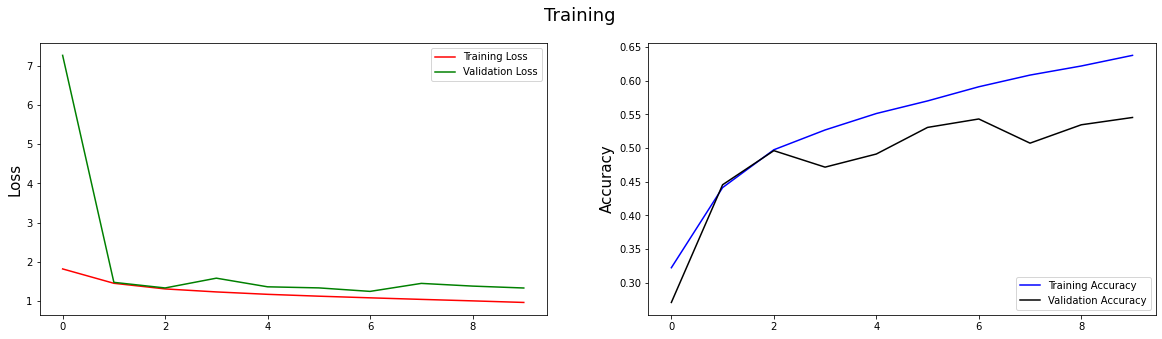

In [44]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.suptitle('Training', fontsize=18)
plt.ylabel('Loss', fontsize=15)
plt.plot(hist.history['loss'], color='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color='g', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='black', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

# Test Your Own Image

## Input image URL

(-0.5, 799.5, 575.5, -0.5)

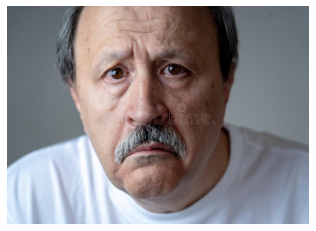

In [220]:
#@title Paste Image URL below:
url = "https://thumbs.dreamstime.com/b/portrait-older-adult-senior-man-pain-sad-exhausted-face-human-emotions-facial-expression-retirement-128516153.jpg" #@param {type:"string"}
from PIL import Image
import requests

# response = requests.get(url)
# img = Image.open(BytesIO(response.content))

img = Image.open(requests.get(url, stream=True).raw)
plt.imshow(img, cmap='gray')
plt.axis('off')

## Save image to drive

In [221]:
from keras.preprocessing.image import load_img, img_to_array, save_img
input_arr = img_to_array(img)
save = save_img('/test_image01.jpg', input_arr)
path = "test_image01.jpg"

In [222]:
!ls

 araba.jpg			  Img_Class_w_VGG16.ipynb
 ddef.jpg			  kepce.jpg
 dog1.jpg			  MNIST_Ornek.ipynb
 Emotion_Detection.ipynb	  models
 Emotion_Detection_My_CNN.ipynb   Pomeranian_01.jpeg
 Evrisim.ipynb			  test_image01.jpg
 f35.jpg			  tree.jpg
 Fashion_MNIST.ipynb		  Untitled0.ipynb
 fer2013.csv			 'VGG16 in Keras.ipynb'


In [223]:
def img_process(img, target):
  img = load_img(path,target_size=target, color_mode="grayscale")
  input_arr = img_to_array(img)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  return input_arr

In [203]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

## Print prediction result

Fear
52 %


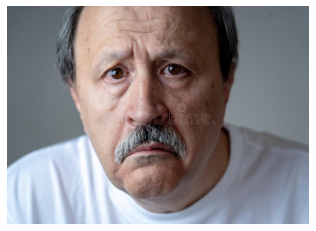

In [224]:
test_data = img_process(img, (48,48))
result = model.predict(test_data)
# print(result)


plt.imshow(img, cmap='gray')
plt.axis('off')
print(labels[np.argmax(result)])
print(int(np.max(result)*100),"%")